
## Project:  Allstate Claims Severity
#### Author:   Joseph Downs, James Peng, Megan Pera, Diana Rodenberger 
#### Purpose:  Evaluate multiple regression models to predict cost and severity of claims for AllState
#### Created:  10/29/2016

### Team name in Kaggle: UCB_207_1

## Link to Leaderboard
https://www.kaggle.com/c/allstate-claims-severity/leaderboard


### Topics included

#### 1) Definition of global variables
#### 2) Preprocessing train set: create dummy variables, split dataset into train and dev
#### 3) Function to estimate best parameters for classifiers
#### 4) Data Exploration of Continous Variables
#### 5) Model 1: Linear Regression with dummy variables using RIDGE
#### 6) Model 2: PCA and Regression
#### 7) Model 3: Run regression models with Lasso
#### 8) Model 4: Run regression models with ElasticNet
#### 9) Model 5: Run regression models with DecisionTreeRegressor





In [48]:
%matplotlib inline
import unittest

# General libraries.
import re, os, sys
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction import 
from sklearn import preprocessing

from sklearn.utils import shuffle

from sklearn.metrics import mean_absolute_error

from sklearn import linear_model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# regularization methos
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

## Global variables

In [2]:
##GLOBAL VARIABLES

DUMMY_COLS=[]  #list of dummy variables
CONTINOUS_COLS=[]  #list of continous variables
#R_CLS          #Regression classifier defined in multiple sections of the code

## Preprocessing train set

 1) Extract data and load into dataframe
 
 2) Create dummy variables for categorical variables
 
 3) Transform the variable 'loss'
 
 4) Create training datasets and development datasets.

In [3]:

df_data = pd.read_csv('./data_in/train.csv')
df_data.shape

(188318, 132)

In [4]:
#split data frame into categorical variables, continous variables (including all 'contx' variables and 'loss') and ids


#separate categorical variables & continous variables.
cat_cols=[]
cont_cols=[]
for c in df_data.columns:
    if c.find('cat') >=0: # -1: substring not found, >=0, starting index
        cat_cols.append(c)
    elif c.find('cont')>=0:
        cont_cols.append(c)

df_cont_vars = df_data[cont_cols]
        
#convert categorical variables into dummy variables
df_dummy_vars=pd.get_dummies(df_data[cat_cols])

#set global vars for later use
DUMMY_COLS=df_dummy_vars.columns
CONTINOUS_COLS=cont_cols


#create dataset with predictors
X = pd.concat([df_dummy_vars, df_cont_vars], axis=1)
#create dataset with dependent variable
y = np.log10(df_data.loss)
#create additioanl dataset with claim ids
id = df_data.id


X_train, X_dev, y_train, y_dev, id_train, id_dev = train_test_split( X, y, id, test_size=0.33, random_state=1)

In [5]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_dev shape: ',X_dev.shape)
print('y_dev shape: ',y_dev.shape)


X_train shape:  (126173, 1153)
y_train shape:  (126173,)
X_dev shape:  (62145, 1153)
y_dev shape:  (62145,)


In [6]:
X_train.head(2)

,cat1_A,cat1_B,cat2_A,cat2_B,cat3_A,cat3_B,cat4_A,cat4_B,cat5_A,cat5_B,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
18739,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.380560,0.608838,0.546949,0.45289,0.42289,0.55533,0.511698,0.557380,0.642600,0.221177
155434,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.568839,0.439206,0.407462,0.45883,0.46853,0.52221,0.441763,0.443374,0.324464,0.340194


### Data Exploration of Continous Variables

More work needs to be done in this section

1) Check the distribution.

2) Check for correlation.

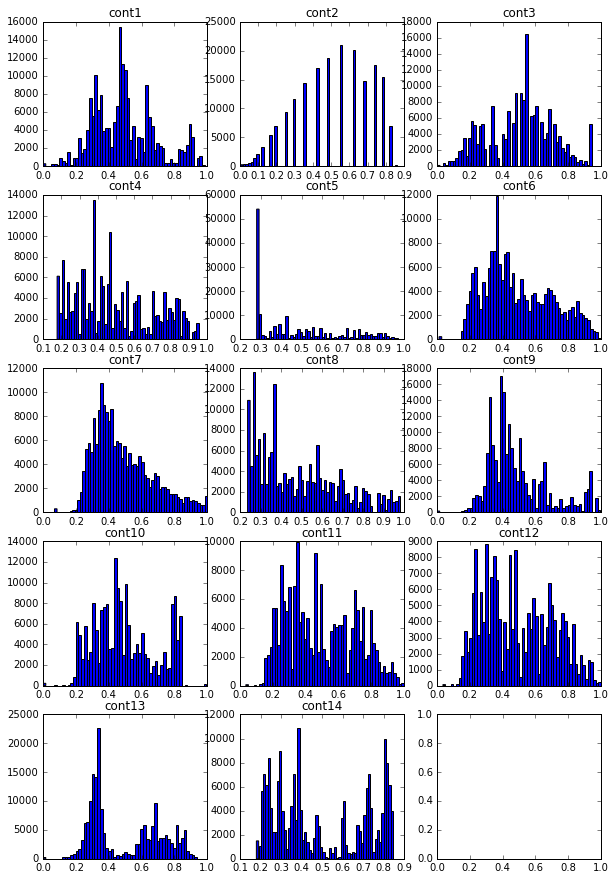

In [7]:
#function to plot histograms of continous variables
def PlotHisContinousVars(df):

    plt.subplots(5,3, figsize=(10,15))
    jj = 0
    for column_name in df.columns:
        jj+=1
        plt.subplot(5,3,jj).hist(df[column_name],normed=False, bins=60)
        plt.subplot(5,3,jj).set(title=column_name)
    plt.show()
 

PlotHisContinousVars(df_cont_vars)


Plot dependent variable

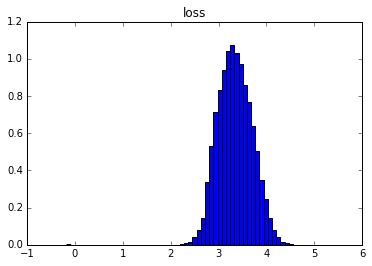

In [8]:
plt.cla()
plt.subplot(1,1,1).hist(y_train,normed=True, bins=60)
plt.subplot(1,1,1).set(title='loss')
plt.show()

#### TODO: more data exploration of continous variables

### Function to estimate best parameters for classifiers

Warning: The call to this function can take a long time.

In [9]:
def EvaluateHyperParams(cls, params, X_data, y_data):
    
    pipeline = Pipeline([
     ('clf', cls),
    ])

    
    
    grid_search = GridSearchCV(pipeline, params)
    grid_search.fit(X_data, y_data)
    
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    return best_parameters

### Baseline scores

The following are the baseline scores submitted for the competition

mean_absolute_error on training data: [-0.19872471 -0.19753498 -0.19821047]

mean_absolute_error on test data 0.198086964004104


#### Function to estimate MAE for specified regression classifier (Ridge, Lasso, etc)

In [26]:
def EstimateMAEForRegression(cls, X_train,y_train,X_test, y_test):
    
    # Train the model using the training sets
    cls.fit(X_train, y_train)

    # predict dev set
    preds = cls.predict(X_test)
   
    s = cross_val_score(cls, X_train, y_train, scoring='neg_mean_absolute_error')
    
    

    print('mean_absolute_error on training data: {0}'.format(s))

    mae = mean_absolute_error(y_test, preds)
    print('mean_absolute_error on dev data {0}'.format(mae))

### Model 1: Linear Regression with dummy variables using RIDGE

We will try 3 different values of alpha

TODO: Find optimal values of alpha combined with other hyper-parameters

Find optimal value of alpha

In [11]:
parameters = {
    'clf__alpha': (0.00001, .001, 0.1, 0.8),
    }
best_parameters=EvaluateHyperParams(cls=linear_model.Ridge(),params=parameters,X_data=X_train, y_data=y_train)

Best score: 0.515
Best parameters set:
	clf__alpha: 0.8


Somehow, GridSearch returns 0.8 as the best alpha value but in practice, the best parameter is 0.00001 of the ones that we tried.

#### alpha =0.00001

In [27]:
pd.options.mode.chained_assignment = None

alpha=0.00001

r_cls=linear_model.Ridge(alpha=alpha, normalize=True)

print("Regression -Ridge with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

Regression -Ridge with alpha :  1e-05
mean_absolute_error on training data: [-0.19243734 -0.19133839 -0.19246453]
mean_absolute_error on dev data 0.19163931525070824


#### alpha =0.001

In [28]:
alpha=0.001

r_cls=linear_model.Ridge(alpha=alpha, normalize=True)

print("Regression -Ridge with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

Regression -Ridge with alpha :  0.001
mean_absolute_error on training data: [-0.19241614 -0.19134146 -0.19247004]
mean_absolute_error on dev data 0.1916296757533237


#### alpha =0.1

In [29]:
alpha=0.1

r_cls=linear_model.Ridge(alpha=alpha, normalize=True)

print("Regression -Ridge with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

Regression -Ridge with alpha :  0.1
mean_absolute_error on training data: [-0.19251016 -0.19139904 -0.1925847 ]
mean_absolute_error on dev data 0.19171244952642735


#### alpha=0.8 as suggested by GridSearchCV

In [30]:
alpha=0.8

r_cls=linear_model.Ridge(alpha=alpha, normalize=True)

print("Regression -Ridge with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

Regression -Ridge with alpha :  0.8
mean_absolute_error on training data: [-0.19603084 -0.19491022 -0.19598921]
mean_absolute_error on dev data 0.19531763130822408


### Model 2: PCA and Regression

Create a model for regression that uses PCA components for dummy variables + continous variables. Here are the steps to run this model:

1) Create a dataset with PCA components of dummy variables. 

2) Create a dataset with just continous variables. 

3) Create a combined dataset using datasets from step 1 and 2.

4) Do steps 1-3 for training data and dev data.

5) Run regression.

### Pre-processing: Find the number of components that explains most of the variance.

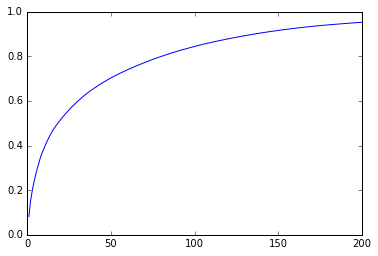

In [16]:


def ExploreNumPCAComponents(n_pca_comp):

    pca = PCA(n_components=n_pca_comp)
    pca.fit(X_train)
    cum_vars=[]
    components=[]
    cumulative_var=0
    for ii in range(len(pca.explained_variance_ratio_)):
        cumulative_var+=pca.explained_variance_ratio_[ii]
        cum_vars.append(cumulative_var)
        components.append(ii+1)
        
    plt.plot(components, cum_vars)
    
    plt.show()
    return cum_vars

cum_vars=ExploreNumPCAComponents(200)



In [17]:
print('Total variance explained by first PCA component: %0.6f \n' % cum_vars[0])
print('Total variance explained by 8 PCA components: %0.6f \n' % cum_vars[8])
print('Total variance explained by 50 PCA components: %0.6f \n' % cum_vars[49])
print('Total variance explained by 100 PCA components: %0.6f \n' % cum_vars[99])
print('Total variance explained by 200 PCA components: %0.6f \n' % cum_vars[199])

Total variance explained by first PCA component: 0.081600 

Total variance explained by 8 PCA components: 0.369046 

Total variance explained by 50 PCA components: 0.702629 

Total variance explained by 100 PCA components: 0.844001 

Total variance explained by 200 PCA components: 0.952089 



##### Total variance explained by 200 components is 95.21%. 

### Create Training set and Development Set with PCA components + Continous Variables

Function to create a dataframe with PCA components. 

In [18]:
def PCAComponentsToDataFrame(PCAComp, index_list):
    #### Purpose: Transform PCA components to DataFrame
    dic_comp={}
    ii=0
    for ii in range(PCAComp.shape[1]):
        key= 'comp' + str(ii+1)
        dic_comp[key]=PCAComp[:,ii]

    #create dataframes with pca components
    return pd.DataFrame(dic_comp, index=index_list)
    

##### Create a new training set and dev set with pca components (for dummy variables) +  continous variables

Try 200 components because that explains the most variance

In [19]:


n_pca_comp=200
    
#create with dummy variables to create PCA components - test
df_train_dummy_vars=X_train[DUMMY_COLS]
df_dev_dummy_vars=X_dev[DUMMY_COLS]

#create dataset with continous vars
df_dev_cont_vars=X_dev[CONTINOUS_COLS]
df_train_cont_vars=X_train[CONTINOUS_COLS]


#Run PCA with dummy vars
pca = PCA(n_components=n_pca_comp)
train_data_pca = pca.fit_transform(df_train_dummy_vars)
dev_data_pca = pca.transform(df_dev_dummy_vars)

#### Transform PCA components to DataFrame, preserve the index of the original datasets.
df_train_data_pca=PCAComponentsToDataFrame(train_data_pca,list(id_train.index))

df_dev_data_pca=PCAComponentsToDataFrame(dev_data_pca,list(id_dev.index))

#--- Concatenate PCA components and continous variables
X_train_pca = pd.concat([df_train_data_pca, df_train_cont_vars], axis=1)

X_dev_pca = pd.concat([df_dev_data_pca, df_dev_cont_vars], axis=1)

    


In [20]:
#checks

print(X_train.shape)
print(df_train_cont_vars.shape)
print(df_train_dummy_vars.shape)

print(df_train_data_pca.shape)
print(X_train_pca.shape)
print(X_dev_pca.shape)

(126173, 1153)
(126173, 14)
(126173, 1139)
(126173, 200)
(126173, 214)
(62145, 214)


### Run regression models with 200 PCA components + continous vars

In [21]:
parameters = {
    'clf__alpha': (0.00001, .001, 0.1, 0.8),
    'clf__solver': ('auto', 'sag'),
    }
best_parameters=EvaluateHyperParams(cls=linear_model.Ridge(),params=parameters,X_data=X_train_pca, y_data=y_train)

Best score: 0.510
Best parameters set:
	clf__alpha: 0.8
	clf__solver: 'sag'


In [31]:
alpha=0.00001

r_cls=linear_model.Ridge(alpha=alpha, normalize=True)

print("Regression with PCA components and continous variables -Ridge with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=X_train_pca,y_train=y_train,X_test=X_dev_pca, y_test=y_dev)

Regression with PCA components and continous variables -Ridge with alpha :  1e-05
mean_absolute_error on training data: [-0.1932844  -0.19232054 -0.19277652]
mean_absolute_error on dev data 0.19257604362925101


In [32]:
alpha=0.1

r_cls=linear_model.Ridge(alpha=alpha, normalize=True)

print("Regression with PCA components and continous variables -Ridge with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=X_train_pca,y_train=y_train,X_test=X_dev_pca, y_test=y_dev)

Regression with PCA components and continous variables -Ridge with alpha :  0.1
mean_absolute_error on training data: [-0.19484667 -0.19380686 -0.19426065]
mean_absolute_error on dev data 0.1941320703119683


In [33]:
alpha=0.0000001

r_cls=linear_model.Ridge(alpha=alpha, normalize=True)

print("Regression with PCA components and continous variables -Ridge with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=X_train_pca,y_train=y_train,X_test=X_dev_pca, y_test=y_dev)

Regression with PCA components and continous variables -Ridge with alpha :  1e-07
mean_absolute_error on training data: [-0.19328436 -0.19232048 -0.19277651]
mean_absolute_error on dev data 0.19257599115765475


The following function features columns with the larges coefficients.

In [37]:
def SelectFeaturesLargestCoeff(cls, X):
    #select columns with top coe
    col_names=X.columns

    sorted_index=np.argsort(cls.coef_)
    best_coeff_vars=[]
    for ii in range(15):
        best_coeff_vars.append(col_names[sorted_index[(len(sorted_index)-ii-1)]])
    return best_coeff_vars
    



Use features with the largest coefficients

In [38]:
best_coeff_vars=[]
best_coeff_vars=SelectFeaturesLargestCoeff(r_cls,X_train_pca)
df_X_train_pca_best=X_train_pca[best_coeff_vars]
df_X_dev_pca_best=X_dev_pca[best_coeff_vars]

In [39]:
parameters = {
    'clf__alpha': (0.00001, .001, 0.1, 0.8),
     }
best_parameters=EvaluateHyperParams(cls=linear_model.Ridge(),params=parameters,X_data=df_X_train_pca_best, y_data=y_train)

Best score: 0.409
Best parameters set:
	clf__alpha: 0.8


In [40]:
alpha=0.8

r_cls=linear_model.Ridge(alpha=alpha, normalize=True)

print("Regression using features with largest coefficients (PCA comp + cont var) -Ridge with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=df_X_train_pca_best,y_train=y_train,X_test=df_X_dev_pca_best, y_test=y_dev)



Regression using features with largest coefficients (PCA comp + cont var) -Ridge with alpha :  0.8
mean_absolute_error on training data: [-0.23438716 -0.23314661 -0.23406143]
mean_absolute_error on dev data 0.23369849535881398


### Model 3: Run regression models with Lasso

In [41]:
parameters = {
    'clf__alpha': (0.00001, .001, 0.1, 0.8),
     }
best_parameters=EvaluateHyperParams(cls=linear_model.Lasso(),params=parameters,X_data=X_train_pca, y_data=y_train)

Best score: 0.510
Best parameters set:
	clf__alpha: 1e-05


In [42]:
alpha=0.00001

r_cls=linear_model.Lasso(alpha=alpha, normalize=True)

print("Regression using PCA comp + cont var -Lasso with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

Regression using PCA comp + cont var -Lasso with alpha :  1e-05
mean_absolute_error on training data: [-0.19402205 -0.19310384 -0.19360335]
mean_absolute_error on dev data 0.19404828489146358


### Model 4: Run regression models with ElasticNet

In [44]:
alpha=0.1

r_cls=linear_model.ElasticNet(alpha=alpha, normalize=True)

print("Regression -ElasticNet with alpha : ", alpha)

EstimateMAEForRegression(cls=r_cls,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)

Regression -ElasticNet with alpha :  0.1
mean_absolute_error on training data: [-0.28671312 -0.28530872 -0.28741102]
mean_absolute_error on dev data 0.2870492180727514


### Model 5: Run regression models with DecisionTreeRegressor

In [50]:
max_depth=5

r_cls=DecisionTreeRegressor(max_depth=max_depth)

print("Regression -DecisionTreeRegressor with max_depth : ", max_depth)

EstimateMAEForRegression(cls=r_cls,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)


Regression -DecisionTreeRegressor with max_depth :  5
mean_absolute_error on training data: [-0.22122523 -0.22006794 -0.22022364]
mean_absolute_error on dev data 0.22001315494768253


In [52]:
max_depth=15

r_cls=DecisionTreeRegressor(max_depth=max_depth)

print("Regression -DecisionTreeRegressor with max_depth : ", max_depth)

EstimateMAEForRegression(cls=r_cls,X_train=X_train,y_train=y_train,X_test=X_dev, y_test=y_dev)


Regression -DecisionTreeRegressor with max_depth :  15
mean_absolute_error on training data: [-0.21463787 -0.21365397 -0.21327359]
mean_absolute_error on dev data 0.2088402841718654


### Predict the Test Dataset

 1) Extract data and load into dataframe
 
 2) Create dummy variables for categorical variables
 
 3) Predict loss based on 'best' model previously found : Ridge with alpha= 0.00001


In [ ]:
# = pd.read_csv('./data_in/test.csv')

In [ ]:
#test_cat_cols=[]
#test_cont_cols=[]
#for c in df_test.columns:
    #if c.find('cat') >=0: # -1: substring not found, >=0, starting index
        #test_cat_cols.append(c)
    #elif c.find('cont')>=0:
        #test_cont_cols.append(c)

#test_df_cont_vars = df_test[test_cont_cols]
        
#convert categorical variables into dummy variables
#test_df_dummy_vars=pd.get_dummies(df_test[test_cat_cols])

#create dataset with predictors
#X_test = pd.concat([test_df_dummy_vars, test_df_cont_vars], axis=1)
#id_test = df_test.id


In [ ]:

#print('num columns in test: ', X_test.shape[1])
#print('num columns in train: ', X_train.shape[1])

## Important note:

When transforming categorical variables into dummy variables, we get a different set of variables for the training data and the test data. The train data and the test data have different categories for some categorical variables; thus, when we tranform categorical variables to dummy variables then a different set of dummy variables for the train and test data. 

See file 'Allstate - Create train and test datasets with dummy vars' to fix this problem
